<a href="https://colab.research.google.com/github/AaryanGotad/ml-practice/blob/main/tensorflow_practice/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify: predicting a numerical variable nased on some other combination of variables, even shorter... predicting a number.

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.19.0


### Creating some data to view and fit

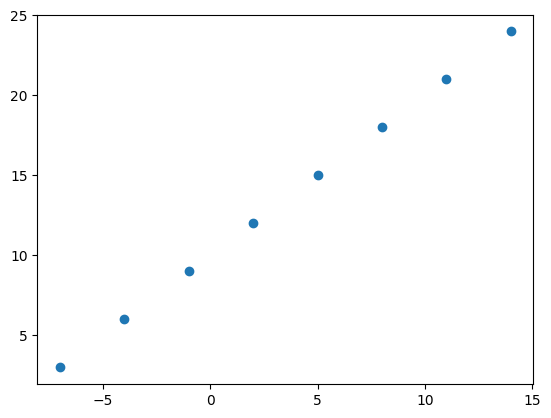

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info  = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

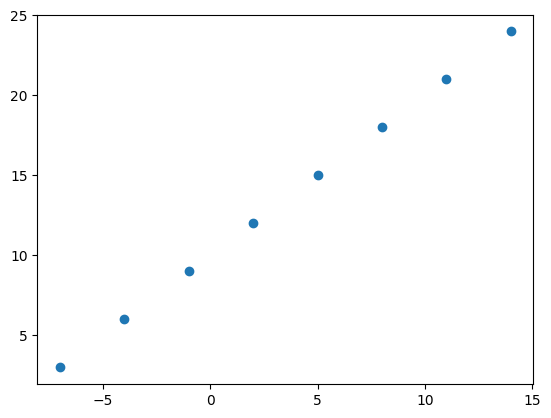

In [ ]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss funtions (in other words, the function which tells our model how wrong it is) the optimizer (tells our model how to improce the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - loss: 9.0792 - mae: 9.0792
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.9467 - mae: 8.9467
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.8142 - mae: 8.8142
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.6817 - mae: 8.6817
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.5492 - mae: 8.5492


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[24.497389]], dtype=float32)

In [ ]:
y_pred + 15

array([[39.49739]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps tje **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - loss: 19.8643 - mae: 19.8643
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 19.5831 - mae: 19.5831
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 19.3018 - mae: 19.3018
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 19.0206 - mae: 19.0206
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 18.7393 - mae: 18.7393
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 18.4581 - mae: 18.4581
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 18.1768 - mae: 18.1768
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 17.8956 - mae: 17.8956
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 17.6143 - mae: 17.6143
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 17.3331 - mae: 17.3331
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 17.0518 - mae: 17.0518
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 16.7706 - mae: 16.7706
Epoch 13/100
1/1 ━━━

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[29.325573]], dtype=float32)

### Homework

Trying out some model tweakings

Lets see what happens when we add new hidden layers with 100 neurons each

In [ ]:
# 1. Adding another hidden layer with 100 neurons
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model2.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - loss: 13.9536 - mae: 13.9536
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.3676 - mae: 13.3676
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.7863 - mae: 12.7863
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.2005 - mae: 12.2005
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.6119 - mae: 11.6119
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.0216 - mae: 11.0216
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.4160 - mae: 10.4160
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.7919 - mae: 9.7919
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.1345 - mae: 9.1345
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.4409 - mae: 8.4409
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.7103 - mae: 7.7103
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.9370 - mae: 6.9370
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [ ]:
# 1. Adding another hidden layer with 100 neurons
model2.add(tf.keras.layers.Dense(100, activation="relu"))

#3. Fit the model
model2.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.6591 - mae: 3.6591
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3.6991 - mae: 3.6991
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 3.6673 - mae: 3.6673
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3.6702 - mae: 3.6702
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 3.6756 - mae: 3.6756
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 3.6411 - mae: 3.6411
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 3.6840 - mae: 3.6840
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 3.6254 - mae: 3.6254
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 3.6934 - mae: 3.6934
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 3.6363 - mae: 3.6363
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 3.6643 - mae: 3.6643
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 3.6446 - mae: 3.6446
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms

In [ ]:
# Now lets see how accurately the model predicts the true answer
model2.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[2.9695084e+00, 7.3353462e+00, 2.1115825e+00, 5.3219867e+00,
        0.0000000e+00, 3.5997591e+00, 3.1806855e+00, 3.5720756e+00,
        0.0000000e+00, 6.6832933e+00, 5.3011847e+00, 6.2900362e+00,
        5.8425641e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.3282638e+00, 5.0829821e+00, 5.1924930e+00, 7.1234946e+00,
        0.0000000e+00, 0.0000000e+00, 1.6521749e+00, 0.0000000e+00,
        6.3646345e+00, 0.0000000e+00, 2.1343307e+00, 0.0000000e+00,
        2.5196369e+00, 0.0000000e+00, 7.2296004e+00, 0.0000000e+00,
        1.6057215e+00, 0.0000000e+00, 7.8345618e+00, 0.0000000e+00,
        7.1195092e+00, 5.8062057e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.9486213e+00, 7.4405128e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 6.8972139e+00, 4.8245730e+00, 6.4351544e+00,
        3.1969744e-01, 2.8140144e+00, 0.0000000e+00, 8.2268035e-01,
        5.9089386e-03, 4.8363695e+00, 3.3662401e

Ok the output is not making any sense to me so i will watch the video further and come back here!

Now let's see what happens if we change the optimizer to a more common one, the Adam's optimizer with a learning rate of 0.0001

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["mae"])

model3.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - loss: 18.5948 - mae: 18.5948
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 18.5942 - mae: 18.5942
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 18.5936 - mae: 18.5936
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 18.5930 - mae: 18.5930
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 18.5924 - mae: 18.5924
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 18.5918 - mae: 18.5918
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 18.5912 - mae: 18.5912
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 18.5906 - mae: 18.5906
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 18.5900 - mae: 18.5900
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.5894 - mae: 18.5894
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 18.5888 - mae: 18.5888
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.5882 - mae: 18.5882
Epoch 13/100
1/1 ━━━━━━━

Hmm not very impressive, compared to the results we got just by adding a few hidden layers, maybe we can try changing the learning rate a bit

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["mae"])

model4.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step - loss: 7.6616 - mae: 7.6616
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.6571 - mae: 7.6571
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.6526 - mae: 7.6526
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.6481 - mae: 7.6481
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.6436 - mae: 7.6436
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.6391 - mae: 7.6391
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 7.6346 - mae: 7.6346
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.6301 - mae: 7.6301
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.6256 - mae: 7.6256
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.6211 - mae: 7.6211
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.6166 - mae: 7.6166
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.6121 - mae: 7.6121
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/st

hmmm still not very good though, maybe this works better when paired the additional hidden layers

#### Pairing hidden layers and Adam's optimizer together now to see how well does that model perform

In [ ]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model5.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["mae"])

model5.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.7323 - mae: 13.7323
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.7046 - mae: 13.7046
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.6771 - mae: 13.6771
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 13.6495 - mae: 13.6495
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.6218 - mae: 13.6218
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.5945 - mae: 13.5945
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.5678 - mae: 13.5678
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 13.5412 - mae: 13.5412
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.5146 - mae: 13.5146
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 13.4879 - mae: 13.4879
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.4614 - mae: 13.4614
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.4354 - mae: 13.4354
Epoch 13/100
1/1 ━━━━━━━━━━

Nice!

In [ ]:
# Let's predict something with this model now shall wee
model5.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[5.1294403]], dtype=float32)

### Ok end of homework!

In [ ]:
#1. Create the model, this time with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - loss: 12.7712 - mae: 12.7712
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.1698 - mae: 12.1698
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.5599 - mae: 11.5599
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.9384 - mae: 10.9384
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.3039 - mae: 10.3039
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.6453 - mae: 9.6453
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.9602 - mae: 8.9602
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.2420 - mae: 8.2420
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.4775 - mae: 7.4775
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.6615 - mae: 6.6615
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.7871 - mae: 5.7871
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.8838 - mae: 4.8838
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

This is significantly better than the previous model!

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[31.2919]], dtype=float32)

The model is overfitting!!

as our metrics are low but the predictions is even more wrong than our previous model

(True value - 27.0)

In [ ]:
#1. Create the model, this time reducing the number of hidden units and tweaking the activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step - loss: 12.6233 - mae: 12.6233
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.1736 - mae: 12.1736
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.7182 - mae: 11.7182
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.2545 - mae: 11.2545
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.7804 - mae: 10.7804
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.2933 - mae: 10.2933
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.7907 - mae: 9.7907
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.2700 - mae: 9.2700
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.7287 - mae: 8.7287
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 8.1640 - mae: 8.1640
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 7.5729 - mae: 7.5729
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 7.2480 - mae: 7.2480
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

ok so a slightly higher mae than before but let's see how well does this model predict than before

In [ ]:
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[30.940441]], dtype=float32)

there is definetly some improvement there

In [ ]:
#1. Create the model, this time changing the optimizer to adam aswell
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.3618 - mae: 13.3618   
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 13.2906 - mae: 13.2906
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.2193 - mae: 13.2193
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.1480 - mae: 13.1480
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.0767 - mae: 13.0767
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.0054 - mae: 13.0054
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.9340 - mae: 12.9340
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.8626 - mae: 12.8626
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.7912 - mae: 12.7912
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.7197 - mae: 12.7197
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.6481 - mae: 12.6481
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.5765 - mae: 12.5765
Epoch 13/100
1/1 ━━━━━━━

now let's see the predictions

In [ ]:
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[32.036114]], dtype=float32)

its worse than SGD

In [ ]:
#1. Create the model, this time increasing the learning rate
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # default is 0.001, so we increase it by a tenfold
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.5485 - mae: 12.5485
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.7337 - mae: 11.7337
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.9544 - mae: 10.9544
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.3515 - mae: 10.3515
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.7312 - mae: 9.7312
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.0920 - mae: 9.0920
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.4310 - mae: 8.4310
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.7400 - mae: 7.7400
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.0158 - mae: 7.0158
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.2559 - mae: 6.2559
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.4610 - mae: 5.4610
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.6269 - mae: 4.6269
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47

Damn!!! that is some low mae.
but let's see how well it predicts

In [ ]:
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[27.909153]], dtype=float32)

**Perfect!!** Our model is not only almost correct, but also not overfitting this time!

So, in our case, adjusting the learning rate of our optimizer resulted in the best improvement so far

### Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden uniq_stable
* Change the activation functions
* Change the optimization function
* Change the learning rate (Potentially the **MOST** important hyperparameter you can change on all of your Neural Network)
* Fitting on more data
* Fitting for longer (no. of epochs)

### Evaluating a model